# Maximum-likelihood estimate for mean lifetime in radioactive decay - Yago Obispo Gerster | mn304 | yago.obispo_gerster@stud.uni-heidelberg.de

## Tasks

a) The maximum likelihood estimator for the mean lifetime $\tau$ of a radioactive decay desribed by the distribution

$$ f(t, \tau) = \frac{1}{\tau} e^{-t/\tau}$$

is give by 

$$\hat \tau = \frac{1}{n} \sum_{i=1}^n t_i.$$

The standard deviation of $\hat \tau$ can be estimated as 

$$\sigma_\tau^2 = - \left(\frac{\partial^2 \ln L(\tau)}{\partial^2 \tau} \Big|_{\tau = \hat \tau} \right)^{-1}$$

Use that to show that the uncertainty of $\hat \tau$ is given by $\sigma_\tau = \frac{\hat \tau}{\sqrt{n}}$

b) Use the function *generate_data* defined below to generate a data set with 30 and 300 samples for $\tau = 2$, respectively. Plot the log-likelihood function $\ln L(\tau)$ along with the parabolic approximation. 

$$ \ln L(\tau) \approx \ln L_\mathrm{max} - \frac{(\tau - \hat \tau)^2}{2 \sigma^2}$$

What can you conclude about the validity of the approximtion as the sample size increases?

c) Generate 1000 data sets each with 500 samples for $\tau = 2$ and determine for each data set whether the true value of tau lies in the interval $[\hat \tau - \sigma_{\hat \tau}, \hat \tau + \sigma_{\hat \tau}]$. How often does the true value lie in this interval? What is your expection for the correspinding probability?


### Hints

It is recommended to not start coding right away. Try to really understand how the Likelihood looks first. Realize, what the Likelihood is a function of and what it describes.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def generate_data(tau, n_samples):
    return np.random.exponential(tau, n_samples)

## Excercise a: Uncertainty of mean life time of radioactive decay measurement

In the first excercise, we consider the distribution
$$ f(t, \tau) = \frac{1}{\tau} e^{-t/\tau}$$
for the description of a radioactive decay - being $\tau$ the mean lifetime. Let $t_1,...,t_N$ be $N$ measurements of time.
The likelihood function per definition takes the following form:
$$L(t,\tau) = \prod\limits_{i=1}^{n} f(t_i,\tau)=\prod\limits_{i=1}^{n}\frac{1}{\tau} e^{-t_i/\tau}$$
Here, we consider the times $t$ to be fixed and the model parameter $\tau$ to be variable. In order to find the best model parameter $\tau$, we maximize the Likelihood function. Practically it turns out to be easier to maximize the Log-Likelihood function which is easier to compute:
$$ ln L(t,\tau) = ln\left(\prod\limits_{i=1}^{n}\frac{1}{\tau} e^{-t_i/\tau}\right)
=\sum\limits_{i=1}^{n}ln\left(\frac{1}{\tau} e^{-t_i/\tau}\right)$$
$$\partial_\tau ln L(t,\tau) = \sum\limits_{i=1}^{n}\left(-\frac{1}{\tau}+\frac{t_i}{\tau^2}\right)=0
\Longleftrightarrow \hat \tau = \frac{1}{n}\sum\limits_{i=1}^{n} t_i$$

We have therefore found, that the best estimator for the mean lifetime is given by the arithmetic mean of the measured times (the result was given by the instructions but I considered its derivation relevant for understanding the max likelihood method).

For uncorrelated parameters the variance can be computed with:
$$\sigma_{\lambda_j}^2=-\left(\frac{\partial^2 lnL}{\partial\lambda_j\partial\lambda_j}\big|_{\lambda = \hat \lambda}\right)^{-1}$$
For our special case, where $\tau$ is the only model parameter we get:
$$\sigma_{\tau}^2=-\left(\frac{\partial^2 lnL}{\partial\tau^2}\big|_{\tau = \hat \tau}\right)^{-1}$$

We can simplify our expression of the log-max-likelihood function $lnL$ to:
$$ lnL(x,\tau)=\sum\limits_{i=1}^{n}ln\left(\frac{1}{\tau} e^{-t_i/\tau}\right)
=\sum\limits_{i=1}^{n}\left(ln\left(e^{-t_i/\tau}\right)-ln(\tau)\right)$$
$$=-nln(\tau)+ \sum\limits_{i=1}^{n}ln\left(e^{-t_i/\tau}\right)
= -nln(\tau) - \sum\limits_{i=1}^{n}\frac{t_i}{\tau}=-nln(\tau) - \frac{n\cdot \hat \tau}{\tau}$$
To compute the uncertainty we have to derive 2 times:
$$\partial_\tau^2 lnL = \partial_\tau \left(-\frac{n}{\tau} + \frac{n\hat\tau}{\tau^2}\right) = \left(\frac{n}{\tau^2}-\frac{2n\hat\tau}{\tau^3} \right)$$
We obtain:
$$\sigma_\tau^2 = -\left(\frac{n}{\hat\tau^2}-\frac{2n\hat\tau}{\hat\tau^3} \right)^{-1}
=-\left(\frac{n}{\hat\tau^2}-\frac{2n}{\hat\tau^2} \right)^{-1}
=\left(\frac{n}{\hat\tau^2} \right)^{-1}$$
$$ \Longrightarrow \sigma_\tau = \sqrt{\frac{\hat\tau^2}{n}}=\frac{\hat \tau}{\sqrt{n}}$$

## Excercise b: 

Fist, we use the function $\textit{generate_data}$ to generate a data set with $30$ and $300$ samples for $\tau=2$.

In the following, I will plot the log-likelihood function along with the parabolic approximation
$$ \ln L(\tau) \approx \ln L_\mathrm{max} - \frac{(\tau - \hat \tau)^2}{2 \sigma^2}$$

In [3]:
#Generate 2 datasets with 30 and 300 samples and lifetime of 2
ds_30 = generate_data(2,30)
ds_300 = generate_data(2,300)

#Define the log likelihood function
def log_Likelihood_function(tau,ds):
    return np.sum(np.log(np.exp(-ds/tau)/tau))

#Define the parabolic approximation function
def parabolic_Approximation(tau,ds):
    tau_hat = np.mean(ds)
    log_L_max = log_Likelihood_function(tau_hat,ds)
    sigma_tau = tau_hat/np.sqrt(len(ds))
    return log_L_max - (tau-tau_hat)**2/(2*sigma_tau**2)

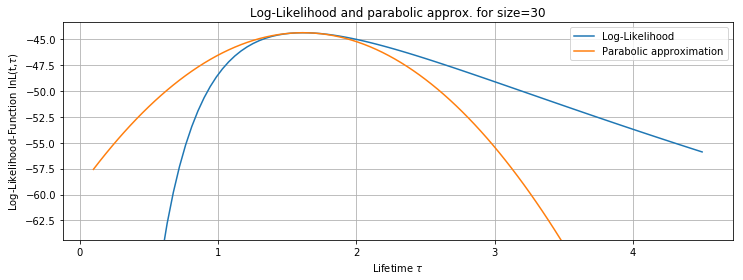

In [4]:
#Plot log-likelihood and parabolic approximation for sample size 30
td = np.linspace(0.1,4.5,100)

#Compute values for the functions
log_Likelihood_30 = list()
approx_30 = list()
for t in td:
    log_Likelihood_30.append(log_Likelihood_function(t,ds_30))
    approx_30.append(parabolic_Approximation(t,ds_30))

#Plot
plt.figure(figsize=(12,4))
plt.title("Log-Likelihood and parabolic approx. for size=30")
plt.grid()
plt.plot(td,log_Likelihood_30,label="Log-Likelihood")
plt.plot(td,approx_30,label="Parabolic approximation")
plt.xlabel(r"Lifetime $\tau$")
plt.ylabel(r"Log-Likelihood-Function lnL(t,$\tau$)")
plt.ylim(np.max(log_Likelihood_30)-20,np.max(log_Likelihood_30)+1)
plt.legend()

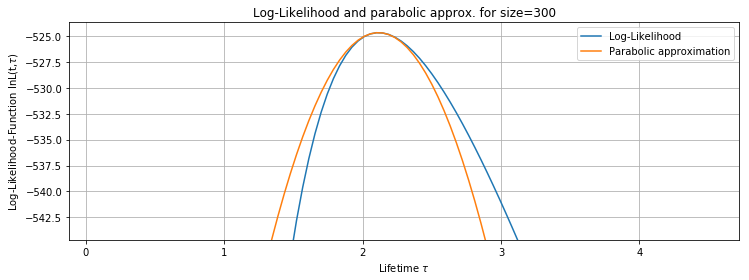

In [5]:
#Plot log-likelihood and parabolic approximation for sample size 30
td = np.linspace(0.1,4.5,100)

#Compute values for the functions
log_Likelihood_300 = list()
approx_300 = list()
for t in td:
    log_Likelihood_300.append(log_Likelihood_function(t,ds_300))
    approx_300.append(parabolic_Approximation(t,ds_300))

#Plot
plt.figure(figsize=(12,4))
plt.title("Log-Likelihood and parabolic approx. for size=300")
plt.grid()
plt.plot(td,log_Likelihood_300,label="Log-Likelihood")
plt.plot(td,approx_300,label="Parabolic approximation")
plt.xlabel(r"Lifetime $\tau$")
plt.ylabel(r"Log-Likelihood-Function lnL(t,$\tau$)")
plt.ylim(np.max(log_Likelihood_300)-20,np.max(log_Likelihood_300)+1)
plt.legend()

As obviously expected, the validity of the approximation becomes better as the sample size increases, as the approximation for a sample size of $300$ is much more accurate than for a size of only $30$.

Furthermore, the parabolic approximation is really accurate for lifetimes close to the expected lifetime and becomes more inaccurate for larger deviations of the expected value.

## Excercise c:
c) Generate 1000 data sets each with 500 samples for $\tau = 2$ and determine for each data set whether the true value of tau lies in the interval $[\hat \tau - \sigma_{\hat \tau}, \hat \tau + \sigma_{\hat \tau}]$. How often does the true value lie in this interval? What is your expection for the corresponding probability?

In the last excercise, we are going to generate 1000 data sets with 500 samples each for a lifetime $\tau=2$. For every dataset the estimator $\hat\tau$ and $\sigma_\tau$ will be computed. We can then make statements about how often the true value of $\tau=2$ lies in the interval $[\hat \tau - \sigma_{\hat \tau}, \hat \tau + \sigma_{\hat \tau}]$.

In [6]:
#Variable in1sigma counts how often the true value lies in the 1sigma interval
in1sigma = 0
true_tau = 2

for i in range(0,1000):
    ds = generate_data(2,500)
    tau_hat = np.mean(ds)
    sig_tau = tau_hat/np.sqrt(500)
    #Check if in 1sigma intervall
    if (tau_hat-sig_tau <= true_tau) and (true_tau <= tau_hat+sig_tau):
        in1sigma +=1
        
print("In {} datasets, the true value lied in the 1-sigma intervall".format(in1sigma))
print("The experimentally estimated probability to find the true value in the 1-sigma-interval for a dataset is " + str(np.round(in1sigma/1000 * 100,1))+"%")

In 687 datasets, the true value lied in the 1-sigma intervall
The experimentally estimated probability to find the true value in the 1-sigma-interval for a dataset is 68.7%


The probability, that the true value of $\tau=2$ lies in the $1\sigma$ interval should correspond to the probability expected from a gaussian distribution of $68,3\%$. We can obtain this value by integrating a gaussian distribution with standard deviation $\sigma$ from $-\sigma$ to $\sigma$. We obtain this, as for large sample sizes, the estimator $\hat\tau$ is normally distributed around the true value.

Comparing this theoretically expected value with the obtained one, we see that both approximately agree. As the generate_data function does create different data each time the notebook is run, we run the notebook several times in order to check this is not a coincidence.